In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [3]:
print(df.columns)
df.head()
df.shape
df.columns[0:10]

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [4]:
features = df.columns[0:10] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508,178.0
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254,104.0
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674,132.0
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154,220.0


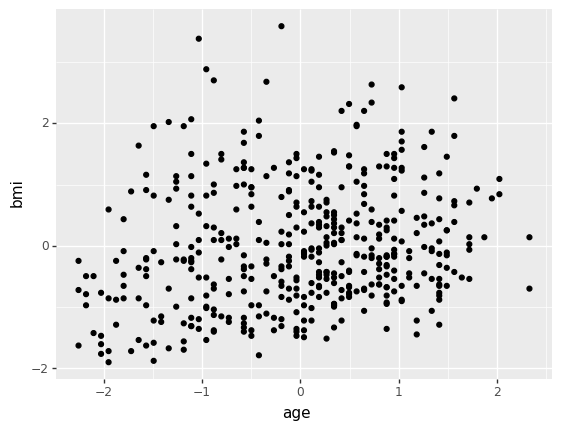

<ggplot: (8757798786325)>

In [5]:
ggplot(df, aes(x = "age", y = "bmi")) + geom_point()

In [6]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_


array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

In [7]:
pcaDF = pd.DataFrame({"pc": range(1,11),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF

,pc,expl_var,cum_var
0,1,0.402421,0.402421
1,2,0.149232,0.551653
2,3,0.120596,0.672249
3,4,0.095548,0.767797
4,5,0.066219,0.834016
5,6,0.060272,0.894288
6,7,0.053656,0.947944
7,8,0.043368,0.991312
8,9,0.007832,0.999144
9,10,0.000856,1.000000


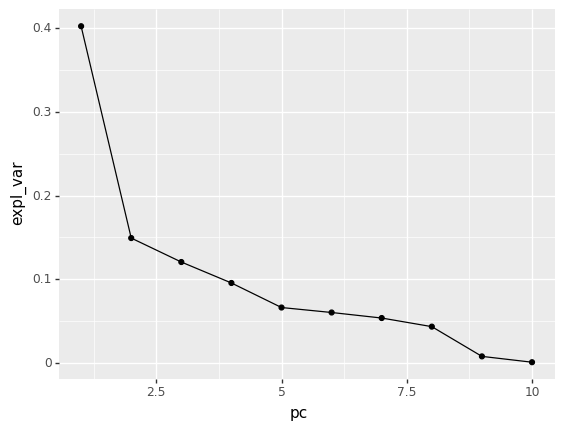

<ggplot: (8757797733909)>

In [8]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

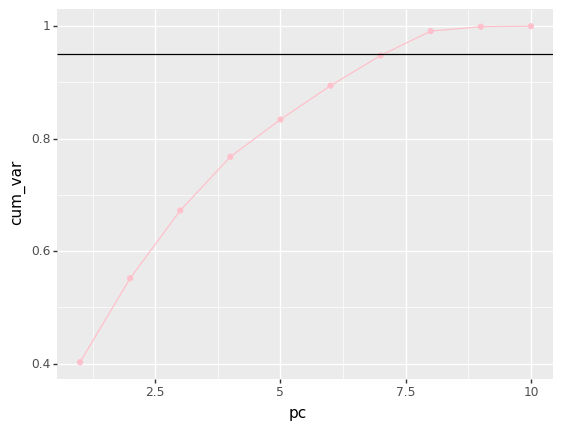

<ggplot: (8757798034445)>

In [9]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [10]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])
df6 = pd.DataFrame(data[:, 0:6])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(df6, df["target"])
print("6 PCs:   ", lr2.score(df6, df["target"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))


all data:  0.27828054298642535
6 PCs:    0.16063348416289594
4 PCs:     0.08823529411764706


# we see that 6 pc compontent give us score close to alldata features score  but the overall score is low may be because that logistic regression isn't the best model